In [1]:
#Importing libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
plt.style.use('ggplot')
import seaborn as sns
import warnings
from sklearn.preprocessing import normalize,StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as shc #without PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Reading the dataset from the local directory
df1 = pd.read_excel('/content/drive/MyDrive/Capstone/dataset_capstone (2).xlsx')

df1.shape


(697846, 26)

In [4]:
df1.head()

,Gender,State,City,Pincode,DOB,Age,Marital Status,Nominee Age,Nominee Relation,Income level,...,Finance Status (Y/N),Model_Name,IC_name,Created_date,ExShowroom_Price,VehicleType,Frame No,Enngine No,Renewdate,Renewal_Status
0,M,TAMIL NADU,Viluppuram,605803,NaN,21.0,M,21.0,Wife,5000To10000,...,Y,SPLENDOR + BS6-I3S DRS,HDFC ERGO General Insurance Company,44287,65335.0,Bike,AW125M5B01355,EYM5B51311,0,0
1,M,UTTAR PRADESH,MUZAFFAR NAGAR,252001,Jan 1 1995,26.0,M,22.0,Wife,10000To20000,...,Y,SPLENDOR+ BS6 DRS CAST FI,HDFC ERGO General Insurance Company,44287,63975.0,Bike,AW119MHC59512,EVMHCB1256,0,0
2,M,KARNATAKA,Davanagere,577566,NaN,34.0,M,25.0,Wife,0to5000,...,N,SPLENDOR + BS6-I3S DRS,HDFC ERGO General Insurance Company,44287,65435.0,Bike,AW122M4C12211,EYM4C08904,0,0
3,M,KERALA,Kasaragod,671531,NaN,19.0,S,50.0,Father,5000To10000,...,N,XPULSE 200 BS6,HDFC ERGO General Insurance Company,44287,116130.0,Bike,DL054MGC01821,AGMGC00968,0,0
4,M,UTTAR PRADESH,MUZAFFAR NAGAR,251001,Jul 15 1996,24.0,M,55.0,Father,5000To10000,...,N,HF DELUXE_DLX 19 BS6 DRS,HDFC ERGO General Insurance Company,44287,61140.0,Bike,AW10XMHA02222,EXMHA02283,0,0


In [5]:
df1 = df1.iloc[:70000,:]
df1.isna().sum()
df1 = df1.drop(columns = ['DOB','Pincode','Nominee Age','ExShowroom_Price','Manufacture Year','Created_date','Renewdate'])
df1 = df1.dropna()
df1.columns

Index(['Gender', 'State', 'City', 'Age', 'Marital Status', 'Nominee Relation',
       'Income level', 'Education level', 'Occupation Type', 'Parking Type',
       'Vehicle Class', 'Policy Effective Date', 'Finance Status (Y/N)',
       'Model_Name', 'IC_name', 'VehicleType', 'Frame No', 'Enngine No',
       'Renewal_Status'],
      dtype='object')

In [6]:
df1 = df1.astype(str)
df1.head(2)

,Gender,State,City,Age,Marital Status,Nominee Relation,Income level,Education level,Occupation Type,Parking Type,Vehicle Class,Policy Effective Date,Finance Status (Y/N),Model_Name,IC_name,VehicleType,Frame No,Enngine No,Renewal_Status
0,M,TAMIL NADU,Viluppuram,21.0,M,Wife,5000To10000,12th,Self Employed,Own_Inside,Private,Apr 1 2021,Y,SPLENDOR + BS6-I3S DRS,HDFC ERGO General Insurance Company,Bike,AW125M5B01355,EYM5B51311,0
1,M,UTTAR PRADESH,MUZAFFAR NAGAR,26.0,M,Wife,10000To20000,10th,Business,Own_Inside,Private,Apr 1 2021,Y,SPLENDOR+ BS6 DRS CAST FI,HDFC ERGO General Insurance Company,Bike,AW119MHC59512,EVMHCB1256,0


In [7]:
from sklearn.model_selection import train_test_split
#Get independent variables
X = df1.drop(columns = ['Renewal_Status'])
#Get dependent variable
Renewal_Status_column = df1.loc[:,'Renewal_Status']
#Turn dependent variable into an array
y = Renewal_Status_column.values
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = ['Age', 'Gender', 'State', 'City', 'Marital Status', 'Nominee Relation',
       'Income level', 'Education level', 'Occupation Type', 'Parking Type',
       'Vehicle Class', 'Policy Effective Date', 'Finance Status (Y/N)',
       'Model_Name', 'IC_name', 'VehicleType', 'Frame No', 'Enngine No'
       ]
le = LabelEncoder()
# apply label encoder on categorical feature columns
#X_train[categorical_cols] = X_train[categorical_cols].apply(lambda col: le.fit_transform(col))
#X_test[categorical_cols] = X_test[categorical_cols].apply(lambda col: le.fit_transform(col))
#y_train[categorical_cols] = y_train[categorical_cols].apply(lambda col: le.fit_transform(col))
#y_test[categorical_cols] = y_test[categorical_cols].apply(lambda col: le.fit_transform(col))

In [9]:
# apply label encoder on categorical feature columns
X_train[categorical_cols] = X_train[categorical_cols].apply(lambda col: le.fit_transform(col))

In [10]:
X_train1 = le.inverse_transform(X_train['Enngine No'])

In [11]:
X_test[categorical_cols] = X_test[categorical_cols].apply(lambda col: le.fit_transform(col))

In [12]:
X_test1 = le.inverse_transform(X_test['Enngine No'])

In [13]:
## normalize the columns
##from sklearn import preprocessing
## normalized_data = preprocessing.StandardScaler().fit_transform(X_train)

In [14]:
#normalized_data = pd.DataFrame(normalized_data,columns=['Age','Income level','Occupation Type','State','Marital Status','City'])

In [15]:
#normalized_data.head()

In [ ]:
## Hierarchical Clustering
## Aproach 1: Euclidean distance, Single linkage
from scipy.cluster import hierarchy
Z = hierarchy.linkage(X_train, 'single', 'euclidean')
plt.figure()
dn = hierarchy.dendrogram(Z)

In [1]:
from scipy import cluster
cutree = cluster.hierarchy.cut_tree(Z, n_clusters=10)

NameError: ignored

In [ ]:
membership = pd.DataFrame(cutree)

In [ ]:
## Aproach 2: Euclidean distance, Complete linkage
from scipy.cluster import hierarchy
Z_2 = hierarchy.linkage(X_train, 'complete', 'euclidean')
plt.figure()
dn = hierarchy.dendrogram(Z_2)

In [ ]:
groups = cluster.hierarchy.cut_tree(Z_2, n_clusters=3)

In [ ]:
membership = pd.DataFrame(groups)

In [ ]:
input["Cluster_ID"] = membership

In [ ]:
cluster1 = input.loc[input["Cluster_ID"]==0,]
cluster1
cluster2 = input.loc[input["Cluster_ID"]==1,]
cluster2
cluster3 = input.loc[input["Cluster_ID"]==2,]
cluster3

In [ ]:
##df_scaled = StandardScaler().fit_transform(X_train)
##df_scaled = pd.DataFrame(df_scaled,columns = X_train.columns)
##df_scaled.columns

<Axes: >

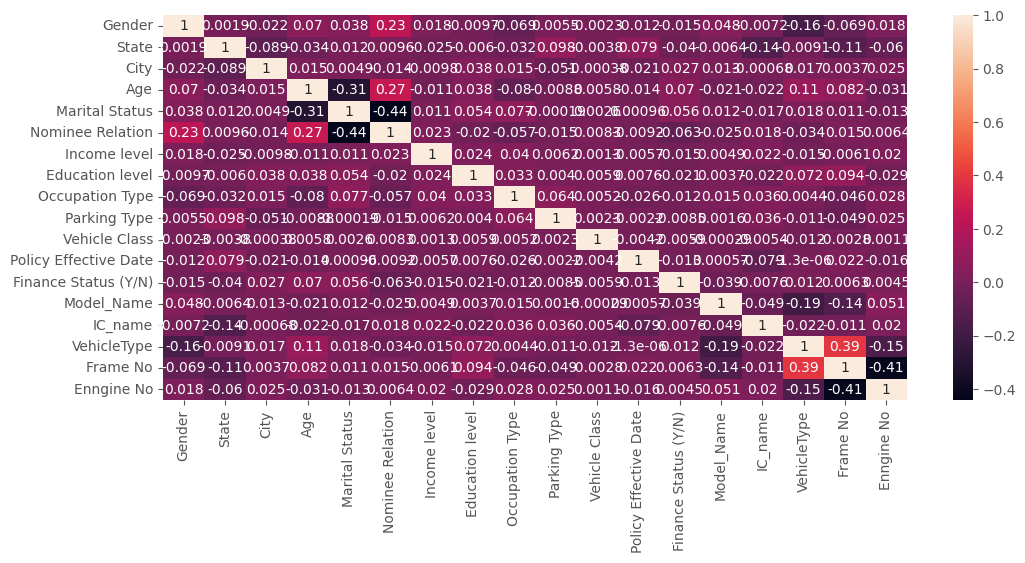

In [16]:
plt.figure(figsize=(12,5))
sns.heatmap(X_train.corr(),annot = True)

In [ ]:
plt.figure(figsize=(15, 7))
plt.title("Dendrograms")
plt.xlabel('Customer')
plt.ylabel('Euclidean distance')
dendro = shc.dendrogram(shc.linkage(X_train, metric = 'euclidean',method='ward'))

In [ ]:
cluster = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')
df1['cluster'] = cluster.fit_predict(X_train)
df1.cluster.value_counts()
df1['cluster'] = df1['cluster']. replace([0,1,2],['Cluster 1','Cluster 2','Cluster 3'])
df1.cluster.value_counts()

In [ ]:
df1.groupby('cluster').mean().T

In [ ]:
##e. Cluster all passengers again using k-means clustering. How many clusters do you want to go with?


df_scaled_temp = MinMaxScaler().fit_transform(X_train)

df_scaled_temp = pd.DataFrame(df_scaled_temp,columns = X_train.columns)

df_scaled_temp


In [19]:
from sklearn.preprocessing import normalize,StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns

<Axes: >

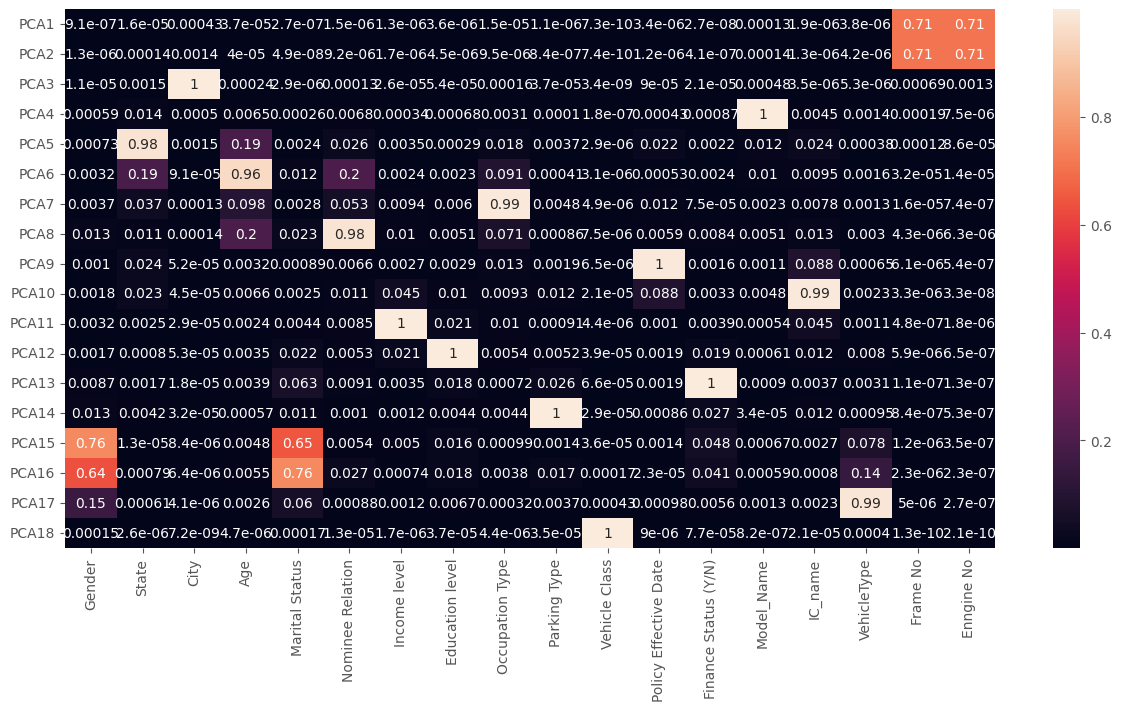

In [17]:
pca = PCA().fit(X_train)

labels = ['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8','PCA9','PCA10','PCA11','PCA12','PCA13','PCA14','PCA15','PCA16','PCA17','PCA18']
plt.subplots(figsize=(15,7))

eigendata = pd.DataFrame(pca.components_[:18], columns=X_train.columns, index= labels)
sns.heatmap(abs(eigendata),annot=True)

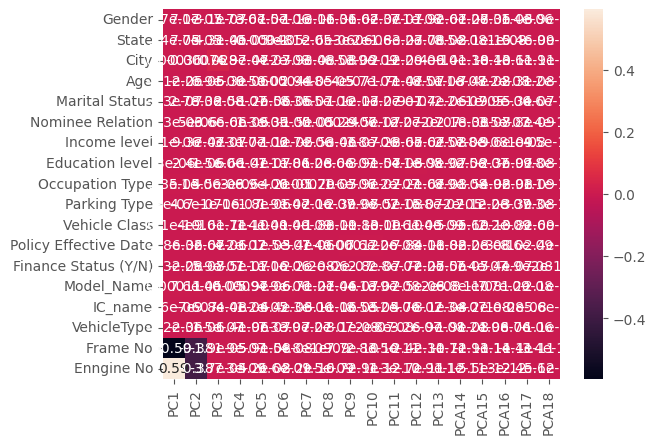

<Figure size 1600x700 with 0 Axes>

In [18]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_ratio_)
loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PCA14','PCA15','PCA16','PCA17','PCA18'], index=X_train.columns)
sns.heatmap(loading_matrix, annot=True)
plt.figure(figsize=(16,7))
plt.show()

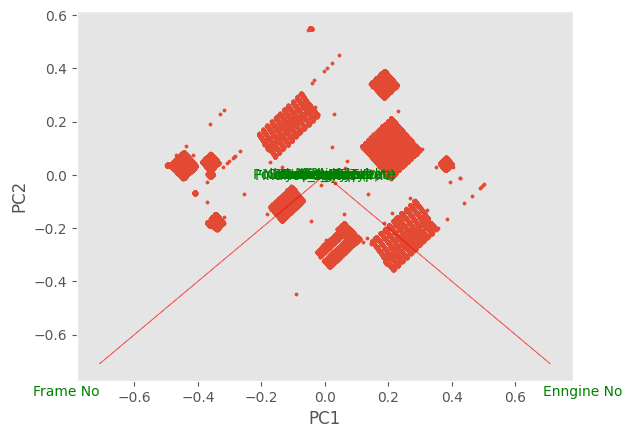

In [19]:
# pca loading biplot
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')

    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

myplot(pca.fit_transform(X_train)[:,0:2],np.transpose(pca.components_[0:2, :]),list(X_train.columns))
plt.show()

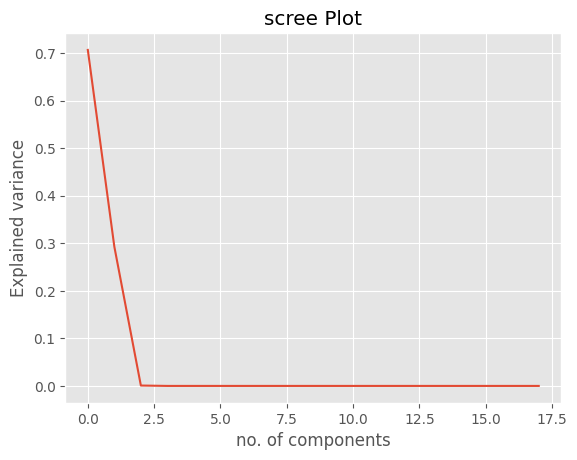

In [20]:
# Running PCA
pca = PCA().fit(X_train)  # fitting pca in the normalised dataset
plt.plot(np.array(pca.explained_variance_ratio_))
plt.xlabel('no. of components')
plt.ylabel('Explained variance')
plt.title('scree Plot');

In [21]:
pca = PCA(n_components=2)
pca1 = pca.fit_transform(X_train)
df_nc_pca = pd.DataFrame(pca1)
df_nc_pca.head()

,0,1
0,-4147.232676,17705.408241
1,-9332.528863,-6531.341556
2,-36638.580669,2407.319770
3,1468.829666,-20390.687202
4,-12550.041879,10620.261327


In [22]:
print(pca.explained_variance_ratio_)

[0.70650376 0.29269362]


In [2]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'SSE')

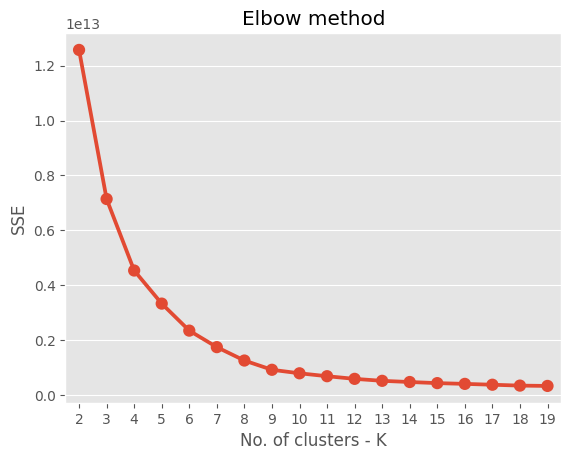

In [23]:
sse = {}
for k in range(2,20):
    kmeans = KMeans(n_clusters = k,random_state = 1)
    kmeans.fit(X_train)
    sse[k]=kmeans.inertia_

sns.pointplot(x=list(sse.keys()),y = list(sse.values()))
plt.title('Elbow method')
plt.xlabel('No. of clusters - K')
plt.ylabel('SSE')

In [24]:
kmeans = KMeans(n_clusters = 6,random_state = 1)
kmeans.fit(X_train)
X_train['kmeancluster'] = kmeans.predict(X_train)
X_train.kmeancluster.value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


4    12717
1    12673
3     9959
0     8703
5     6760
2     4855
Name: kmeancluster, dtype: int64

In [25]:
X_train.kmeancluster.value_counts()

4    12717
1    12673
3     9959
0     8703
5     6760
2     4855
Name: kmeancluster, dtype: int64

In [26]:
X_train.groupby('kmeancluster').mean().round(2).T

kmeancluster,0,1,2,3,4,5
Gender,0.89,0.82,0.87,0.87,0.88,0.91
State,15.70,19.26,25.11,22.17,23.26,20.13
City,1114.55,1047.27,1043.80,1048.36,1038.29,1054.56
Age,16.44,18.02,15.14,16.51,15.86,16.30
Marital Status,2.15,2.16,2.15,2.16,2.15,2.19
Nominee Relation,11.09,11.16,10.86,11.33,10.95,10.46
Income level,2.41,2.30,2.33,2.36,2.34,2.32
Education level,0.88,1.06,0.75,0.93,0.86,0.90
Occupation Type,8.30,7.69,8.74,8.43,8.70,8.76
Parking Type,0.66,0.63,0.72,0.70,0.71,0.67


In [ ]:
df1.to_csv(r'finaldataset.csv')